In [45]:
!pip install PyPortfolioOpt

In [46]:
from itertools import combinations
from pypfopt import expected_returns, risk_models
from pypfopt.efficient_frontier import EfficientFrontier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import requests
import scipy as sc
import scipy.optimize as sc
import seaborn as sns


In [47]:

csv_url = 'https://drive.google.com/uc?id=1RSWblpatnnL4xawZZGbQg0CEfRBU9I_6'
df = pd.read_csv(csv_url)


In [48]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True)
result_df = pd.DataFrame(columns=df.columns)


for column in df.columns:
    # T√≠nh to√°n ph·∫ßn trƒÉm thay ƒë·ªïi gi√° tr·ªã c·ªßa t·ª´ng m√£ c·ªï phi·∫øu gi·ªØa c√°c th√°ng
    change_percentage = df[column].pct_change()
    result_df[column] = change_percentage

In [49]:
# L·∫•y d·ªØ li·ªáu c·ªßa c√°c m√£ c·ªï phi·∫øu c·ª• th·ªÉ
stocks_to_compare = ['FPT', 'HPG']

data_of_stocks = result_df[stocks_to_compare]

print("D·ªØ li·ªáu c·ªßa c√°c m√£ c·ªï phi·∫øu:")
print(data_of_stocks.to_string())



D·ªØ li·ªáu c·ªßa c√°c m√£ c·ªï phi·∫øu:
                 FPT       HPG
Date                          
2019-03-01       NaN       NaN
2019-04-01  0.026905 -0.067153
2019-05-02  0.088427  0.064165
2019-06-03 -0.020412 -0.073527
2019-07-01  0.082760 -0.050756
2019-08-01  0.026539 -0.017394
2019-09-03  0.131934 -0.042032
2019-10-01  0.089385  0.011548
2019-11-01  0.000000  0.000000
2019-12-02 -0.066668  0.047940
2020-01-02  0.073259  0.045757
2020-02-03 -0.121161  0.022912
2020-03-02  0.081556 -0.091652
2020-04-01 -0.240574 -0.226457
2020-05-04  0.193850  0.217397
2020-06-01  0.120476  0.316665
2020-07-01 -0.043480 -0.009042
2020-08-03 -0.006494  0.021592
2020-09-01  0.110353  0.082973
2020-10-01  0.018038  0.088711
2020-11-02  0.017715  0.133331
2020-12-01  0.067698  0.163399
2021-01-04  0.090582  0.188204
2021-02-01  0.054817 -0.093382
2021-03-01  0.226771  0.204697
2021-04-01  0.023107  0.049783
2021-05-04  0.040150  0.232989
2021-06-01  0.220709  0.262368
2021-07-01  0.020665 -0.04865

In [50]:
# T√≠nh ph∆∞∆°ng sai v√† ƒë·ªô l·ªách chu·∫©n c·ªßa c√°c m√£ c·ªï phi·∫øu
variance = data_of_stocks.var() * 100
std_deviation = data_of_stocks.std() * 100

# T√≠nh l·ª£i nhu·∫≠n k·ª≥ v·ªçng c·ªßa c√°c m√£ c·ªï phi·∫øu
expected_return = data_of_stocks.mean() * 100

result_df = pd.concat([expected_return, variance, std_deviation], axis=1)
result_df.columns = ["Expected Return", "Var", "Std"]

print("Th√¥ng tin v·ªÅ Expected Return, Var v√† Std c·ªßa c√°c m√£ c·ªï phi·∫øu:")
print(result_df)


Th√¥ng tin v·ªÅ Expected Return, Var v√† Std c·ªßa c√°c m√£ c·ªï phi·∫øu:
     Expected Return       Var        Std
FPT         3.300817  0.699706   8.364846
HPG         2.261192  1.400597  11.834682


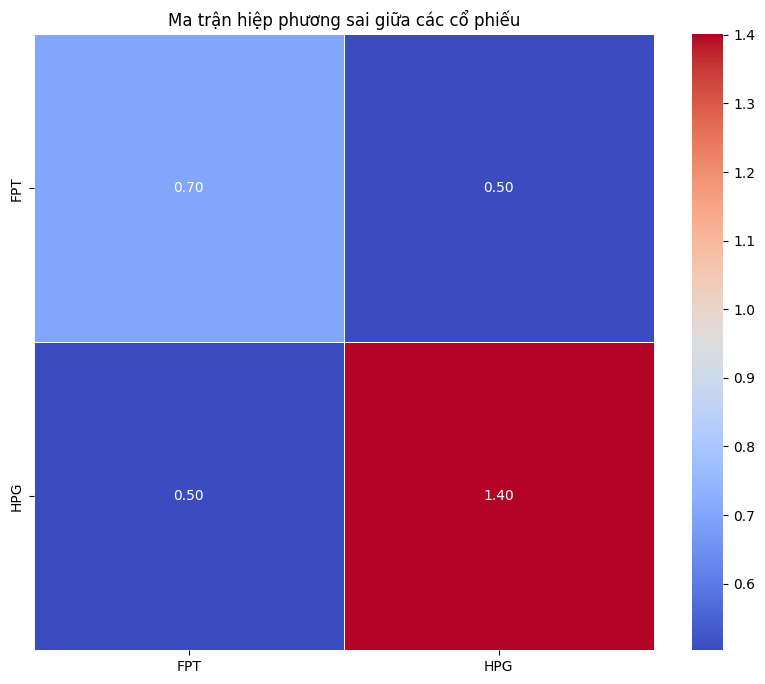

In [51]:
# T√≠nh ma tr·∫≠n hi·ªáp ph∆∞∆°ng sai
covariance_matrix = data_of_stocks.cov() * 100  # ƒê·ªïi th√†nh ph·∫ßn trƒÉm

# V·∫Ω heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Ma tr·∫≠n hi·ªáp ph∆∞∆°ng sai gi·ªØa c√°c c·ªï phi·∫øu")
plt.show()


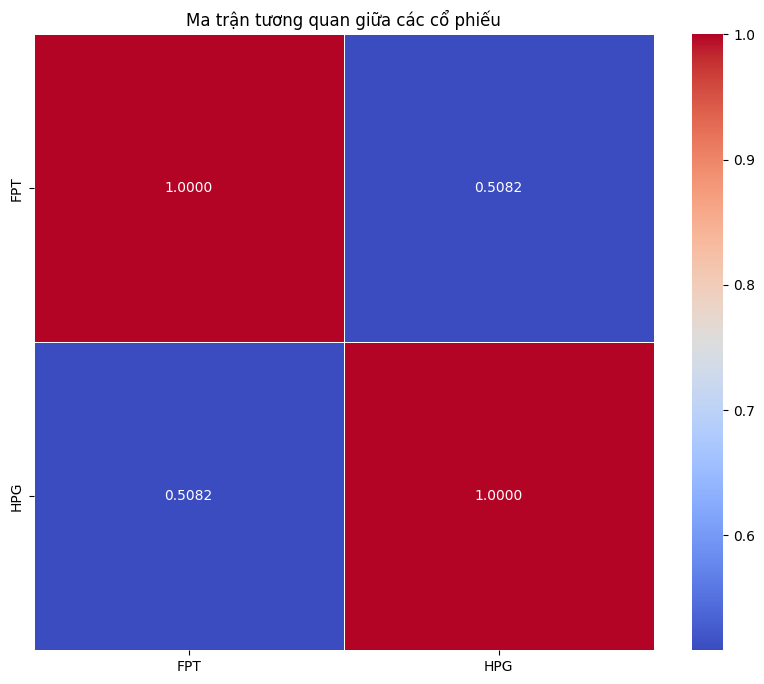

In [52]:
# T·∫°o ma tr·∫≠n t∆∞∆°ng quan t·ª´ ma tr·∫≠n hi·ªáp ph∆∞∆°ng sai
correlation_matrix = data_of_stocks.corr()

# V·∫Ω heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5)
plt.title("Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c c·ªï phi·∫øu")
plt.show()


In [53]:
# Ch·ªçn c√°c m√£ c·ªï phi·∫øu mu·ªën t√≠nh
selected_stocks = ['FPT', 'HPG']

# T√≠nh Expect Return
expect_return_selected = data_of_stocks[selected_stocks].mean()

# T√≠nh (Ri - mean_i)
ri_minus_mean_selected = data_of_stocks[selected_stocks].subtract(expect_return_selected)

print("(Ri - mean_i) c·ªßa c√°c m√£ c·ªï phi·∫øu ƒë√£ ch·ªçn trong 60 th√°ng l√†:")
print(ri_minus_mean_selected)

(Ri - mean_i) c·ªßa c√°c m√£ c·ªï phi·∫øu ƒë√£ ch·ªçn trong 60 th√°ng l√†:
                 FPT       HPG
Date                          
2019-03-01       NaN       NaN
2019-04-01 -0.006104 -0.089765
2019-05-02  0.055419  0.041554
2019-06-03 -0.053420 -0.096139
2019-07-01  0.049752 -0.073368
...              ...       ...
2023-11-01 -0.116699 -0.108490
2023-12-01  0.048959  0.100561
2024-01-02  0.004871 -0.002166
2024-02-01  0.008702 -0.008040
2024-03-01  0.076101  0.085108

[61 rows x 2 columns]


Trung b√¨nh t·ª∑ su·∫•t sinh l·ªùi c·ªßa 10 m√£ c·ªï phi·∫øu trong 60 th√°ng l√†:
FPT    0.033008
HPG    0.022612
dtype: float64


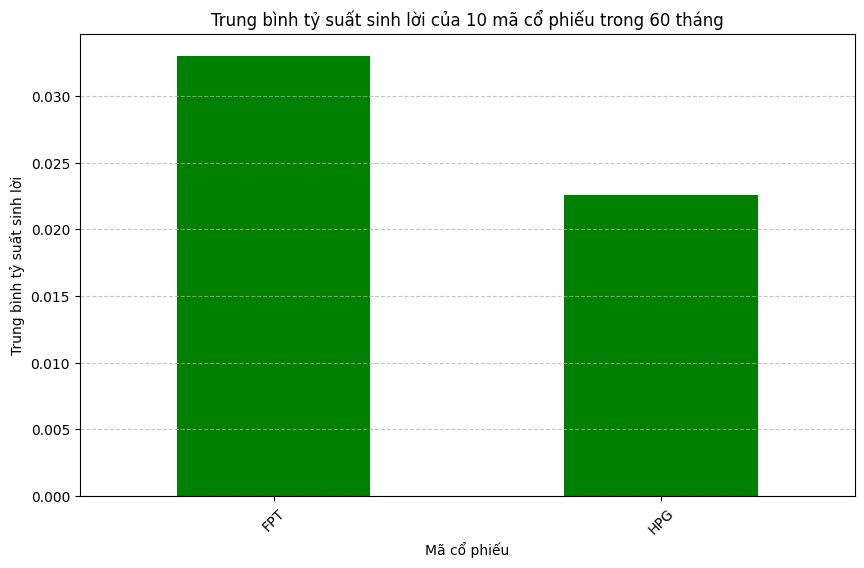

In [54]:
# T√≠nh trung b√¨nh t·ª∑ su·∫•t sinh l·ªùi c·ªßa t·ª´ng m√£ c·ªï phi·∫øu
average_return_per_stock = data_of_stocks.mean()

print("Trung b√¨nh t·ª∑ su·∫•t sinh l·ªùi c·ªßa 10 m√£ c·ªï phi·∫øu trong 60 th√°ng l√†:")
print(average_return_per_stock)

# T√≠nh trung b√¨nh t·ª∑ su·∫•t sinh l·ªùi c·ªßa t·ª´ng m√£ c·ªï phi·∫øu
average_return_per_stock = data_of_stocks.mean()

# ƒê·ªãnh nghƒ©a m√†u s·∫Øc cho gi√° tr·ªã d∆∞∆°ng v√† √¢m
colors = ['red' if x < 0 else 'green' for x in average_return_per_stock]

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt
plt.figure(figsize=(10, 6))
average_return_per_stock.plot(kind='bar', color=colors)
plt.title('Trung b√¨nh t·ª∑ su·∫•t sinh l·ªùi c·ªßa 10 m√£ c·ªï phi·∫øu trong 60 th√°ng')
plt.xlabel('M√£ c·ªï phi·∫øu')
plt.ylabel('Trung b√¨nh t·ª∑ su·∫•t sinh l·ªùi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


In [55]:
csv_url = 'https://drive.google.com/uc?id=1toduRkZH_j4qrq3ueawa9WwlaYGMx_V3'

df = pd.read_csv(csv_url)

# L∆∞u DataFrame v√†o t·ªáp Excel
df.to_excel('Data.xlsx', index=False)


In [56]:
def main():
    # Nh·∫≠p c√°c gi√° tr·ªã t·ª´ ng∆∞·ªùi d√πng
    w_fpt = float(input("Nh·∫≠p tr·ªçng s·ªë c·ªßa FPT (ph·∫ßn trƒÉm): "))
    w_msn = float(input("Nh·∫≠p tr·ªçng s·ªë c·ªßa MSN (ph·∫ßn trƒÉm): "))
    w_vcb = float(input("Nh·∫≠p tr·ªçng s·ªë c·ªßa VCB (ph·∫ßn trƒÉm): "))

    # L∆∞u l·∫°i tr·ªçng s·ªë g·ªëc ƒë·ªÉ hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
    global weights, labels  # ƒê·ªÉ c√≥ th·ªÉ d√πng ·ªü cell kh√°c
    weights = [w_fpt, w_msn, w_vcb]
    labels = ["FPT", "MSN", "VCB"]

    # T√≠nh to√°n t·ªïng tr·ªçng s·ªë
    total_weight = w_fpt + w_msn + w_vcb

    # Chu·∫©n h√≥a tr·ªçng s·ªë cho t√≠nh to√°n (nh∆∞ng gi·ªØ nguy√™n gi√° tr·ªã g·ªëc)
    w_fpt /= total_weight
    w_msn /= total_weight
    w_vcb /= total_weight

    # Nh·∫≠p c√°c gi√° tr·ªã t√†i ch√≠nh
    e_rp = float(input("Nh·∫≠p E(rp) (l·ª£i nhu·∫≠n k·ª≥ v·ªçng): "))
    sigma_p = float(input("Nh·∫≠p ùûºp (ƒë·ªô l·ªách chu·∫©n): "))
    e_rc = float(input("Nh·∫≠p E(rc): "))
    sigma_c = float(input("Nh·∫≠p ùûºc: "))
    rf = float(input("Nh·∫≠p gi√° tr·ªã rf: "))
    U = float(input("Nh·∫≠p gi√° tr·ªã U: "))

    # T√≠nh to√°n Solver v·ªõi function
    y = (e_rc - rf) / (e_rp - rf)
    y_percentage = y * 100
    one_minus_y_percentage = (1 - y) * 100

    # In ra k·∫øt qu·∫£
    print("\nK·∫øt qu·∫£:")
    print("w(FPT):\t{:.2f}%".format(weights[0]))  # D√πng gi√° tr·ªã g·ªëc
    print("w(MSN):\t{:.2f}%".format(weights[1]))
    print("w(VCB):\t{:.2f}%".format(weights[2]))
    print("E(rp):\t{:.2f}%".format(e_rp))
    print("ùûºp:\t{:.2f}%".format(sigma_p))
    print("rf:\t{:.2f}%".format(rf))
    print("\nSolver with function")
    print("y:\t{:.2f}%".format(y_percentage))
    print("1-y:\t{:.2f}%".format(one_minus_y_percentage))
    print("\t100%")
    print("\nE(rc):\t{:.2f}%".format(e_rc))
    print("ùûºc:\t{:.2f}%".format(sigma_c))
    print("\nU:\t{:.2f}".format(U))

if __name__ == "__main__":
    main()

Nh·∫≠p tr·ªçng s·ªë c·ªßa FPT (ph·∫ßn trƒÉm): 40
Nh·∫≠p tr·ªçng s·ªë c·ªßa MSN (ph·∫ßn trƒÉm): 30
Nh·∫≠p tr·ªçng s·ªë c·ªßa VCB (ph·∫ßn trƒÉm): 30
Nh·∫≠p E(rp) (l·ª£i nhu·∫≠n k·ª≥ v·ªçng): 12
Nh·∫≠p ùûºp (ƒë·ªô l·ªách chu·∫©n): 8
Nh·∫≠p E(rc): 10
Nh·∫≠p ùûºc: 6
Nh·∫≠p gi√° tr·ªã rf: 4
Nh·∫≠p gi√° tr·ªã U: 3

K·∫øt qu·∫£:
w(FPT):	40.00%
w(MSN):	30.00%
w(VCB):	30.00%
E(rp):	12.00%
ùûºp:	8.00%
rf:	4.00%

Solver with function
y:	75.00%
1-y:	25.00%
	100%

E(rc):	10.00%
ùûºc:	6.00%

U:	3.00


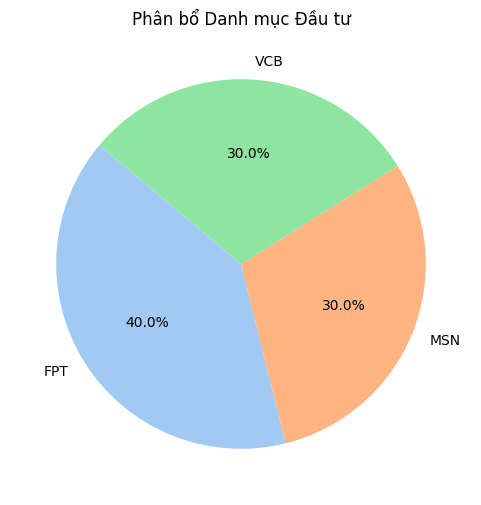

In [57]:
# Ki·ªÉm tra xem weights c√≥ t·ªìn t·∫°i kh√¥ng
if "weights" in globals():
    plt.figure(figsize=(6, 6))
    colors = sns.color_palette("pastel")
    plt.pie(weights, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
    plt.title("Ph√¢n b·ªï Danh m·ª•c ƒê·∫ßu t∆∞")
    plt.show()
else:
    print("‚ö†Ô∏è Ch∆∞a c√≥ d·ªØ li·ªáu! H√£y ch·∫°y cell nh·∫≠p d·ªØ li·ªáu tr∆∞·ªõc.")